In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
y = x^2 + 5*x + 3

In [2]:
x = np.arange(-80, 80, 0.5)
y = x**2 + 5*x + 3

In [3]:
y.shape

(320,)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((256,), (64,))

# Model Definition

In [5]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.MeanSquaredError()
metric = tf.metrics.RootMeanSquaredError()
model_2.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [10]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

In [20]:
hist = model_2.fit(x_train, y_train, batch_size=64, epochs=1000, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 619595.0000 - root_mean_squared_error: 787.0927 - val_loss: 364107.5000 - val_root_mean_squared_error: 603.4132
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 593863.4375 - root_mean_squared_error: 770.5585 - val_loss: 374043.4375 - val_root_mean_squared_error: 611.5909
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 580936.6250 - root_mean_squared_error: 762.1688 - val_loss: 398816.0938 - val_root_mean_squared_error: 631.5189
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 562559.1250 - root_mean_squared_error: 749.9953 - val_loss: 422616.6250 - val_root_mean_squared_error: 650.0897
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 554684.3750 - root_mean_squared_error: 744.7458 - val_loss: 446602.5625 - val_root_mean_squared_error: 668.2833
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 566599.4375 - root_mean_squared_error: 752.6776 - val_loss: 451661.1250 - val_root_mea

In [21]:
y_pred_2 = model_2.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


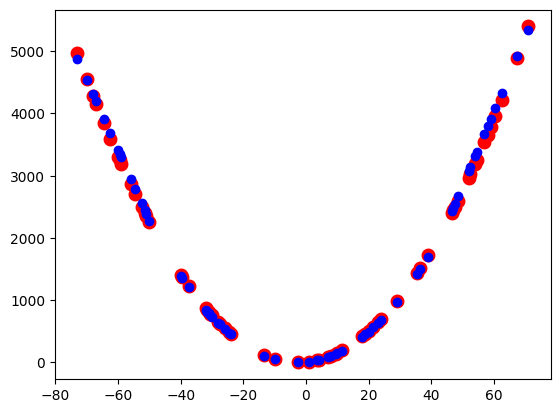

In [22]:
plt.scatter(x_test, y_test, color='red', linewidths=4)
plt.scatter(x_test, y_pred_2, color='blue')
plt.show()

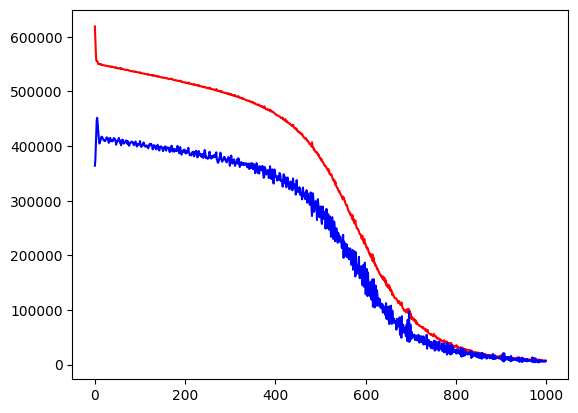

In [23]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.show()